import glob

import cv2

images = [cv2.imread(file) for file in glob.glob("Lab 5 - Images/Tutorial Lab 5 - Images/day/*.jpg")]

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
# from helper import *
# from scipy import fftpack as fp
from skimage import io, color, util, filters, morphology

In [10]:
day_URL = "Lab 5 - Images/Tutorial Lab 5 - Images/day/day1.jpg"
night_URL = "Lab 5 - Images/Tutorial Lab 5 - Images/night/night1.jpg"

In [12]:
day = io.imread(day_URL)
night = io.imread(night_URL)

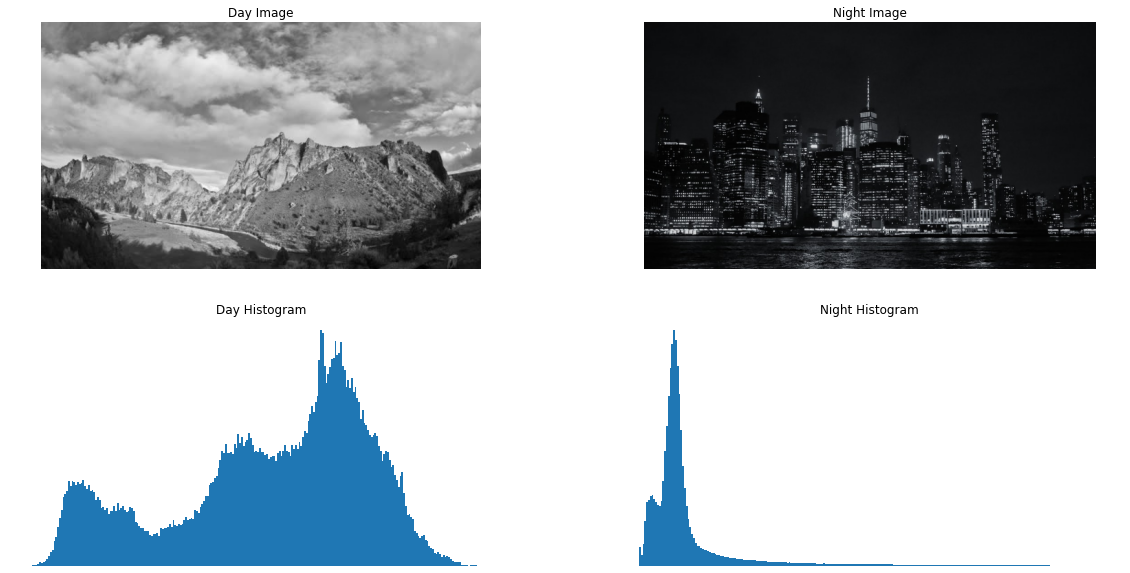

In [13]:
plt.figure(figsize=( 20 , 10 ))
plt.subplot( 2 , 2 , 1 )
plt.title( 'Day Image' )
plt.imshow(day)
plt.axis( 'off' )
plt.subplot( 2 , 2 , 2 )
plt.title( 'Night Image' )
plt.imshow(night)
plt.axis( 'off' )
plt.subplot( 2 , 2 , 3 )
plt.title( 'Day Histogram' )
plt.hist(day.flatten(), 256 , range=( 0 , 255 ))
plt.axis( 'off' )
plt.subplot( 2 , 2 , 4 )
plt.title( 'Night Histogram' )
plt.hist(night.flatten(), 256 , range=( 0 , 255 ))
plt.axis( 'off' )
plt.show()

In [56]:
def predict ( file_name ):
    img = io.imread(file_name)
    frequency_count = np.bincount(img.flatten())
    cum_sum = np.cumsum(frequency_count) 
    print(frequency_count)
    print(cum_sum)
# lebih banyak intensitas rendah, prediksi sebagai malam
    if cum_sum[ 127 ] > (cum_sum[ -1 ] - cum_sum[ 127 ]):
        return 'night'
    else :
        return 'day'

In [57]:
frequency_count

NameError: name 'frequency_count' is not defined

In [59]:
import os
dir_path = 'Lab 5 - Images\\Tutorial Lab 5 - Images'
folders = [ 'day', 'night' ]
for folder in folders :
    for filename in os.listdir(os.path.join(dir_path,folder)):
        filename = f'{dir_path}\\{folder}\\{filename}'
        print ( f'image {filename} predicted as {predict(filename)}')

[   6   15   24   36   75  114  111  117  168  225  351  462  561  849
  975 1326 1635 1938 2361 2469 2571 2904 2757 2904 2889 2778 2898 2808
 2844 2955 2742 2649 2790 2562 2595 2529 2265 2355 2253 1989 2022 1926
 1989 1785 1902 1890 2046 1899 2160 1926 1977 2064 1905 1842 1887 2016
 2001 1899 1509 1488 1365 1308 1314 1215 1212 1215 1071 1029 1083 1083
 1137 1041 1308 1251 1308 1299 1335 1446 1347 1566 1422 1374 1434 1422
 1425 1587 1677 1575 1629 1635 1611 1911 1890 1830 2016 2133 2226 2418
 2412 2769 2856 2886 3027 3084 3375 3651 3939 3894 4182 3873 3879 3936
 3843 4182 4062 4530 4245 4428 4134 4269 4344 4575 4416 4173 3918 3948
 3921 4071 3921 3909 3804 3840 3663 3759 3777 3795 3627 3888 3957 3798
 3942 4149 3951 3933 3795 4146 4011 4170 4017 4266 4143 4443 4638 4587
 4980 5229 5499 5307 5643 5856 7080 8106 8025 6867 6282 6600 6837 7137
 7164 7746 7269 7335 7719 6870 6744 6147 6405 6114 6462 5991 6168 5766
 5637 5061 5358 4902 4845 4680 4500 4446 4521 4587 4479 4116 3966 3600
 3861 

(-0.5, 599.5, 451.5, -0.5)

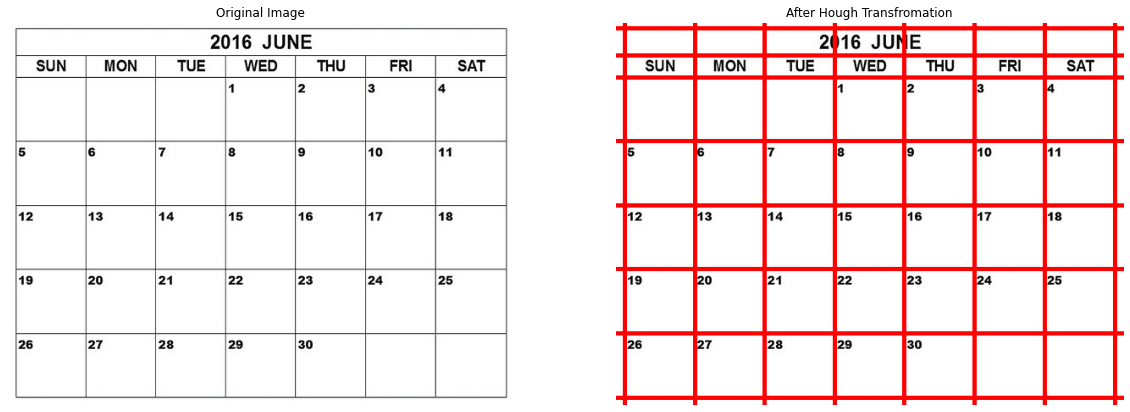

In [38]:
img = io.imread( 'Lab 5 - Images\\Tutorial Lab 5 - Images\\calendar.jpg' )
original_image = np.copy(img)
# convert image to gray
gray = (color.rgb2gray(img) * 255 ).astype(np.uint8)
# find all of the edges using canny
edges = cv2.Canny(gray, 50 , 150 , apertureSize= 3 )
# find all of the lines using hough transformation
lines = cv2.HoughLines(edges, 1 , np.pi/ 180 , 200 )
# plotting line
for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000 *(-b))
        y1 = int(y0 + 1000 *(a))
        x2 = int(x0 - 1000 *(-b))
        y2 = int(y0 - 1000 *(a))
        cv2.line(img, (x1,y1), (x2,y2), ( 255 , 0 , 0 ), 2 )

# Show image
plt.figure(figsize=( 20 , 10 ))
plt.subplot( 1 , 2 , 1 )
plt.title( 'Original Image' )
plt.imshow(original_image)
plt.axis( 'off' )
plt.subplot( 1 , 2 , 2 )
plt.title( 'After Hough Transfromation' )
plt.imshow(img,)
plt.axis( 'off' )

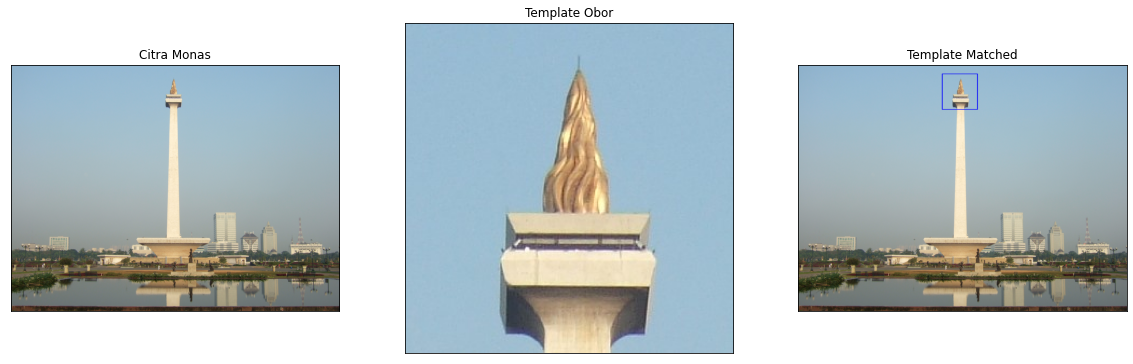

In [42]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Import citra yang dibutuhkan
citra_monas = cv.cvtColor(cv.imread( 'Lab 5 - Images\\Tutorial Lab 5 - Images\\monas.jpg' ),cv.COLOR_BGR2RGB)
template_obor = cv.cvtColor(cv.imread( 'Lab 5 - Images\\Tutorial Lab 5 - Images\\obor-monas.jpg' ),cv.COLOR_BGR2RGB)

# Ubah Gray
citra_monas_gray = cv.cvtColor(citra_monas,cv.COLOR_RGB2GRAY)
template_obor_gray = cv.cvtColor(template_obor,cv.COLOR_RGB2GRAY)

# Menyimpan width dan height template
w, h = template_obor_gray.shape[:: -1 ]

# Apply template matching
# parameter ketiga merupakan method, bisa melihat
# dokumentasi openCV untuk penjelasan lebih lanjut dan
# pilihan method lainnya

res = cv.matchTemplate(citra_monas_gray, template_obor_gray, cv.TM_CCOEFF_NORMED)
# Copy citra monas untuk ditandai bounding box
template_matched = citra_monas.copy()
# Tentukan threshold
threshold = 0.9
loc = np.where( res >= threshold)
# Buat bounding box dengan rectangle. Rectangle memiliki 4 parameter yaitu (image, start_point, end_point, color, thickness)
for point in zip (*loc[:: -1 ]):
    cv.rectangle(template_matched, point, (point[ 0 ] + w, point[ 1 ] + h), ( 0 , 0 , 255 ), 2 )
# Menampilkan citra
plt.figure(figsize=( 20 , 10 ))
plt.subplot( 131 ),plt.imshow(citra_monas)
plt.title( 'Citra Monas' ), plt.xticks([]), plt.yticks([])
plt.subplot( 132 ),plt.imshow(template_obor)
plt.title( 'Template Obor' ), plt.xticks([]), plt.yticks([])
plt.subplot( 133 ),plt.imshow(template_matched)
plt.title( 'Template Matched' ), plt.xticks([]),plt.yticks([])
plt.show()
